$z=cos(x^2+y^2)$ en $[-3,3]\times[-3,3]$

In [2]:
import numpy as np

In [37]:
arr = np.array([[1, 0, 3], [0, 5, 6],[0, 0, 0]])

In [29]:
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [5]:
arr.T    #Transpuesta

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

El operador @ es otra forma de hacer multiplicación de matrices:

In [6]:
arr.T @ arr

array([[ 66,  78,  90],
       [ 78,  93, 108],
       [ 90, 108, 126]])

**numpy.linalg** tiene un conjunto estándar de descomposiciones matriciales, y utilidades como la inversa y el determinante:

In [8]:
import numpy as np
from numpy.linalg import inv, det

In [11]:
det(arr)

-9.51619735392994e-16

Resuelve el siguiente sistema de ecuaciones:

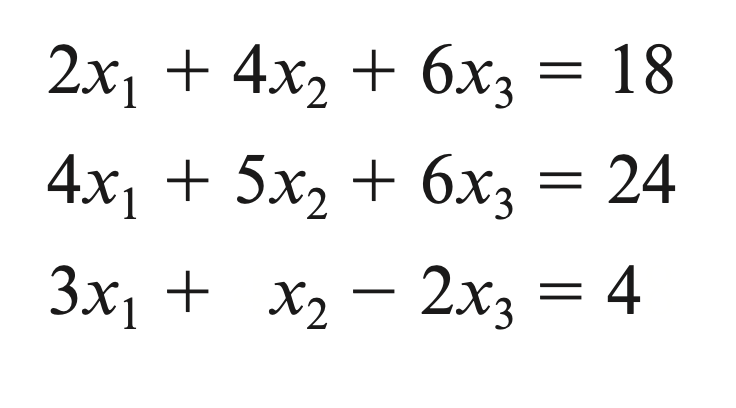

In [13]:
D = np.array([[2,4,6], [4, 5,6],[3, 1, -2]])

In [15]:
D

array([[ 2,  4,  6],
       [ 4,  5,  6],
       [ 3,  1, -2]])

In [16]:
D1 = np.array([[18,4,6], [24, 5,6],[4, 1, -2]])

In [17]:
D1

array([[18,  4,  6],
       [24,  5,  6],
       [ 4,  1, -2]])

In [20]:
x_1 = det(D1)/det(D)

In [22]:
x_1

4.000000000000003

In [23]:
b = np.array([18,24,4])

In [24]:
b

array([18, 24,  4])

In [25]:
x = np.linalg.solve(arr, b)

In [26]:
x

array([ 4., -2.,  3.])

In [32]:
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [38]:
inv(arr)

LinAlgError: Singular matrix

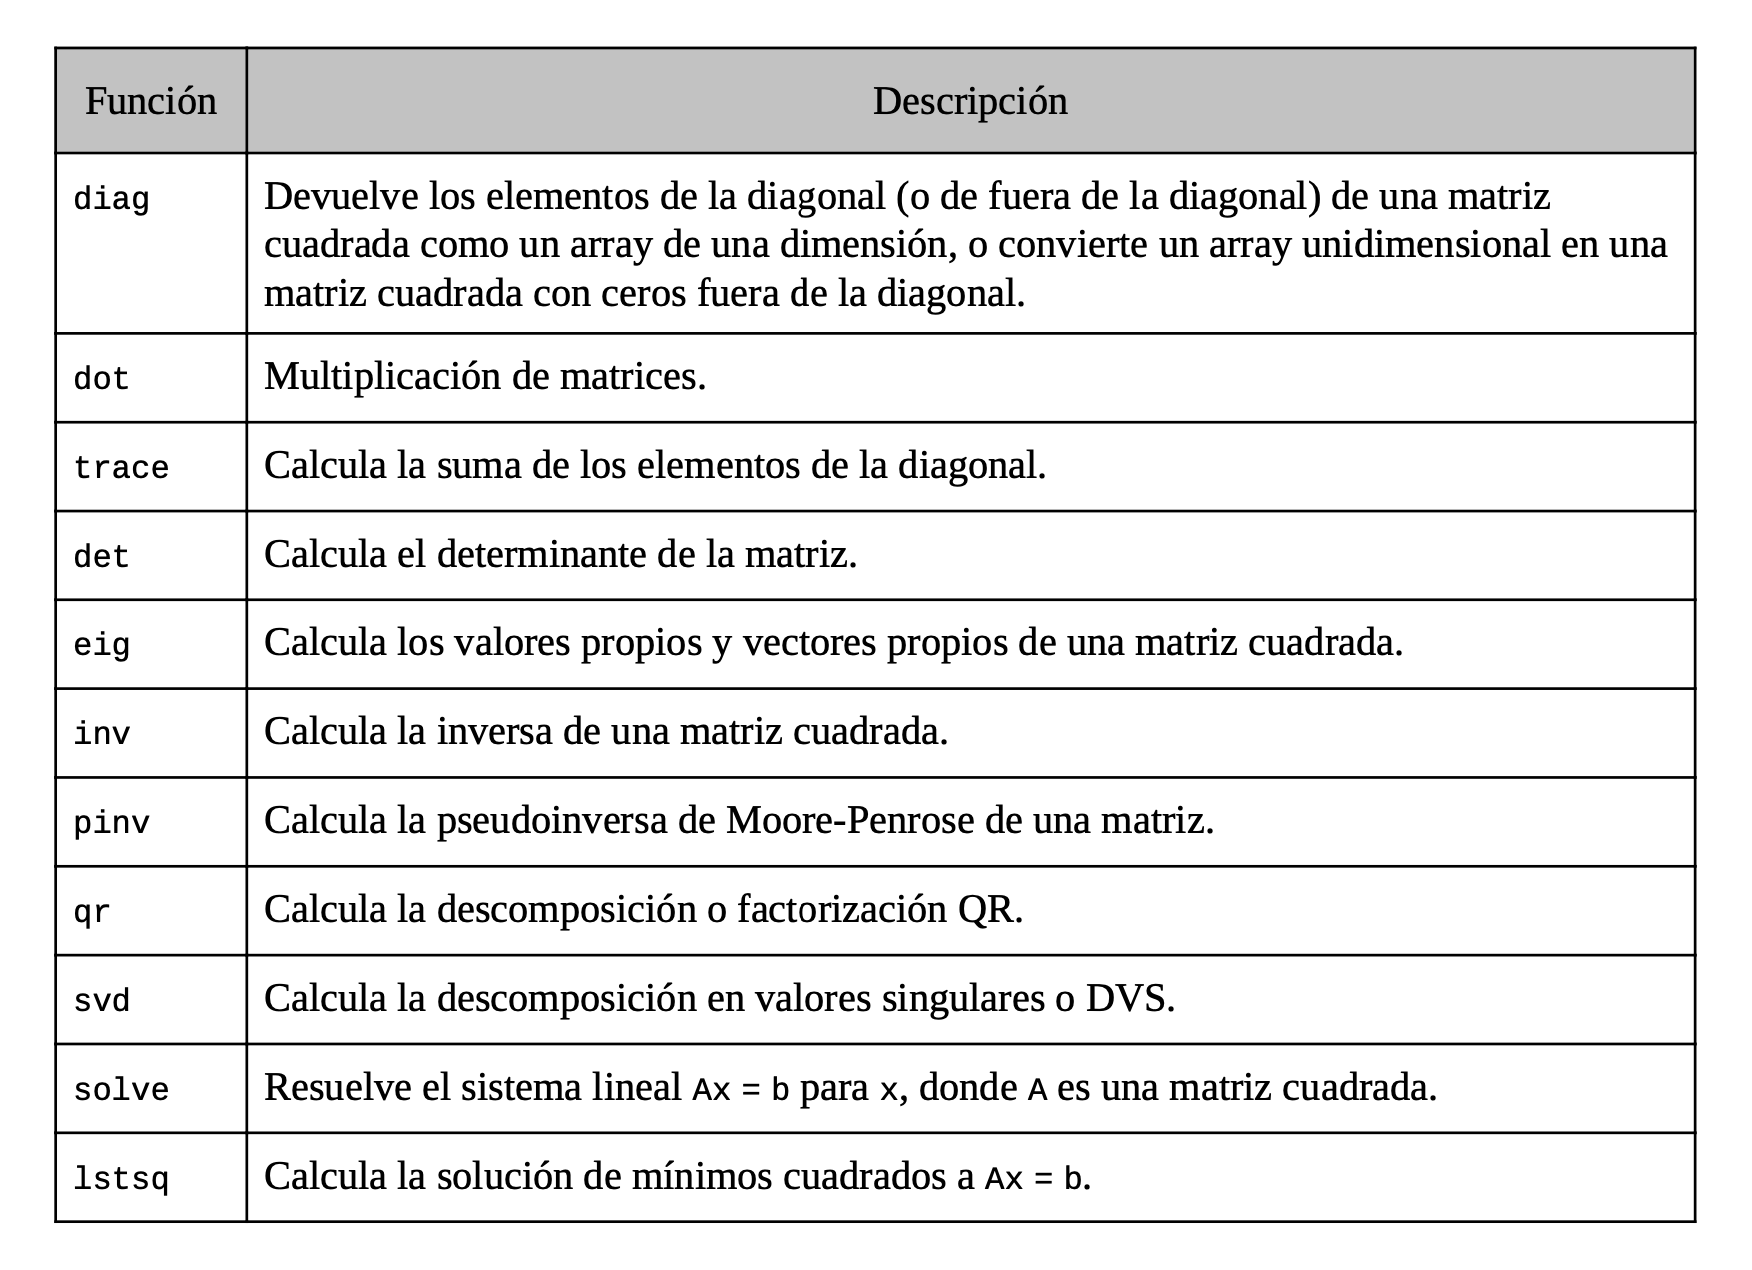

# Paquete Pandas

Pandas es una librería de Python especializada en el manejo y análisis de estructuras de datos. Contiene herramientas de manipulación de datos diseñadas para que la limpieza y el análisis de los datos sean rápidos y cómodos en Python. 

Las principales características de esta librería son:

* Define nuevas estructuras de datos basadas en los arrays de la librería NumPy pero con nuevas funcionalidades.

* Permite leer y escribir fácilmente ficheros en formato CSV, Excel y bases de datos SQL.

* Permite acceder a los datos mediante índices o nombres para filas y columnas.

* Ofrece métodos para reordenar, dividir y combinar conjuntos de datos.

* Permite trabajar con series temporales.

In [39]:
import pandas as pd

Para empezar a trabajar con pandas, es conveniente sentirse cómodo con sus dos estructuras de datos principales: Series y DataFrame.

## Series

Una serie es un objeto unidimensional de estilo array, que contiene una secuencia de valores del mismo tipo y un array asociado de etiquetas de datos, que corresponde a su índice. 

In [40]:
obj = pd.Series([4, 7, -5, 3])

In [41]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

Con frecuencia nos interesará crear una serie con un índice, que identifique cada punto de datos con una etiqueta:


In [43]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [44]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

Aquí, ['d', 'b', 'a', 'c'] se interpreta como una lista de índices, aunque
contenga cadenas de texto en lugar de enteros.

In [45]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [46]:
obj2['a']

-5

In [47]:
obj*2

0     8
1    14
2   -10
3     6
dtype: int64

In [48]:
obj2[obj2 > 0]

d    4
b    7
c    3
dtype: int64

In [49]:
np.exp(obj2)

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [50]:
'b' in obj2

True

Si tenemos datos contenidos en un diccionario Python, podemos crear una serie a partir de él pasando el diccionario:

In [52]:
datos ={'Durango': 125,'Sinaloa':558,'Jalisco':1845,
         'Zacatecas':1432,'Sonora':1723}

In [53]:
obj3 = pd.Series(datos)

In [54]:
obj3

Durango       125
Sinaloa       558
Jalisco      1845
Zacatecas    1432
Sonora       1723
dtype: int64

In [55]:
obj3.to_dict() #Una serie se puede convertir de nuevo en un diccionario 

{'Durango': 125,
 'Sinaloa': 558,
 'Jalisco': 1845,
 'Zacatecas': 1432,
 'Sonora': 1723}

Se puede indexar un diccionario pasando un índice con las claves de diccionario en el orden en el cual se desea que aparezcan en la serie resultante:

In [56]:
estado =['Durango','Sinaloa','Jalisco','Zacatecas','Sonora']

In [57]:
obj4 = pd.Series(datos, index=estado)

In [58]:
obj4

Durango       125
Sinaloa       558
Jalisco      1845
Zacatecas    1432
Sonora       1723
dtype: int64

In [59]:
estado =['Colima','Durango','Sinaloa','Jalisco','Zacatecas','Sonora']

In [61]:
obj4 = pd.Series(datos, index=estado)

In [62]:
obj4

Colima          NaN
Durango       125.0
Sinaloa       558.0
Jalisco      1845.0
Zacatecas    1432.0
Sonora       1723.0
dtype: float64

Para detectar datos faltantes se deben emplear las funciones isna y notna de pandas:

In [63]:
pd.isna(obj4)

Colima        True
Durango      False
Sinaloa      False
Jalisco      False
Zacatecas    False
Sonora       False
dtype: bool

In [64]:
pd.isna(obj4).sum()

1

In [45]:
pd.notna(obj4)

Colima       False
Durango       True
Sinaloa       True
Jalisco       True
Zacatecas     True
Sonora        True
dtype: bool

Las operaciones aritméticas se alinea automáticamente por etiqueta de índice

In [65]:
obj3+obj4

Colima          NaN
Durango       250.0
Jalisco      3690.0
Sinaloa      1116.0
Sonora       3446.0
Zacatecas    2864.0
dtype: float64

Tanto el objeto Series en sí como su índice tienen un atributo name, que se integra con otras áreas de la funcionalidad de pandas

In [66]:
obj4.name = 'homicidios'

In [67]:
obj4.index.name = 'Estado'

In [50]:
obj4

Estado
Colima          NaN
Durango       125.0
Sinaloa       558.0
Jalisco      1845.0
Zacatecas    1432.0
Sonora       1723.0
Name: homicidios, dtype: float64

## Dataframe

Un dataframe representa una tabla rectangular de datos, y contiene una colección de columnas ordenada y con nombre, cada una de las cuales puede tener un tipo de valor distinto (numérico, cadena de texto, booleano, etc.). El objeto DataFrame tiene un índice de fila y otro de columna; se podría considerar como un diccionario de objetos Series que comparten todos el mismo índice.

In [68]:
data = {'Estado': ['Baja_California', 'Guanajuato', 'E_Mexico', 
                   'CDMX', 'Yucatan'],
        'Mujeres': [291, 568, 490, 107, 7],
        'Hombres': [2279, 3408, 2725, 635, 47]}


In [69]:
frame = pd.DataFrame(data)

In [70]:
frame

,Estado,Mujeres,Hombres
0,Baja_California,291,2279
1,Guanajuato,568,3408
2,E_Mexico,490,2725
3,CDMX,107,635
4,Yucatan,7,47


In [71]:
frame.head(2)

,Estado,Mujeres,Hombres
0,Baja_California,291,2279
1,Guanajuato,568,3408


In [72]:
frame.tail(2)

,Estado,Mujeres,Hombres
3,CDMX,107,635
4,Yucatan,7,47


Si se especifica una secuencia de columnas, las columnas del dataframe se dispondrán en ese orden:

In [74]:
pd.DataFrame(data, columns=['Hombres','Mujeres','Estado'])

,Hombres,Mujeres,Estado
0,2279,291,Baja_California
1,3408,568,Guanajuato
2,2725,490,E_Mexico
3,635,107,CDMX
4,47,7,Yucatan


Si se pasa una columna no contenida en el diccionario, aparecerá con valores faltantes en el resultado:

In [75]:
pd.DataFrame(data, columns=['Estado','Hombres','Mujeres', 'Total'])

,Estado,Hombres,Mujeres,Total
0,Baja_California,2279,291,NaN
1,Guanajuato,3408,568,NaN
2,E_Mexico,2725,490,NaN
3,CDMX,635,107,NaN
4,Yucatan,47,7,NaN


In [76]:
frame['Mujeres'] 

0    291
1    568
2    490
3    107
4      7
Name: Mujeres, dtype: int64

In [77]:
frame.Mujeres

0    291
1    568
2    490
3    107
4      7
Name: Mujeres, dtype: int64

Las filas también se pueden recuperar por posición o nombre con los atributos especiales iloc y loc

In [78]:
frame.loc[1]

Estado     Guanajuato
Mujeres           568
Hombres          3408
Name: 1, dtype: object

In [79]:
frame.iloc[1]

Estado     Guanajuato
Mujeres           568
Hombres          3408
Name: 1, dtype: object